https://kwonkai.tistory.com/63

In [3]:
# 라이브러리 설정
import random
import pandas as pd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity
import operator

In [4]:
df = pd.read_csv('동화데이터_최종.csv')

#### 동화 데이터에 id 추가하기

In [5]:
df = df.reset_index()

In [6]:
df

,index,제목,내용,카테고리,키워드,테마
0,0,고양이와 쥐의 파트너십(동반자관계),쥐를 친구로 된 어떤 고양이가 살고 있었다. \r\n고양이는 자신이 쥐에 대해 사랑...,그림형제동화,"['고양이', '돼지 비계', '이름', '항아리', '세례', '대모', '친구'...",교회
1,1,건달들의 무리,하루는 수탉이 암탉에게 말했다. \r\n“나무열매들이 익어 가는 계절이 왔는데 슬슬...,그림형제동화,"['수탉', '암탉', '오리', '나그네', '주막 주인', '마차']",숲속
2,2,실 잣는 세 여인네들,옛날 옛적에 게을러서 실을 잣지 않으려는 소녀가 한 명 있었어요.\r\n엄마가 뭐라...,그림형제동화,"['소녀', '엄마', '왕비', '게으름', '세여인']",왕국
3,3,"지푸라기, 숯, 콩",옛날 어느 마을에 가난한 노파가 한 명 살고 있었어요.\r\n그녀는 접시에 콩들을 ...,그림형제동화,"['숯', '지푸라기', '콩', '탈출', '재봉사', '도움']",마을
4,4,"생쥐, 새, 소시지",옛날 어느 날 생쥐와 새와 ‘소시지’가 동무가 되어 한 집에서 살게 되었어요.\r\...,그림형제동화,"['소시지', '생쥐', '새', '뗄감', '요리', '후회']",숲속
...,...,...,...,...,...,...
437,437,선녀와 나무꾼,"옛날 옛적, 가난해서 장가를 못간 나무꾼이 있었습니다. 하루는 나무를 하러 산에 갔...",전래동화,"['나무꾼', '선녀', '노루', '아이', '날개옷', '실수']",마을
438,438,"금도끼, 은도끼",옛날 한 작은 마을에 착한 나무꾼이 살았습니다. 나무꾼은 가난했지만 착하고 정직한 ...,전래동화,"['도끼', '나무꾼', '산신령', '정직함', '욕심']",연못
439,439,심청전,옛날 한 마을에 심봉사 라고 불리는 장님에게 심청이라는 착하고 이쁜 딸이 있었습니다...,전래동화,"['심청', '아버지', '약속', '공양미', '희생', '효도']",마을
440,440,은혜갚은 까치,옛날 한 선비가 과거를 보러 한양를 가기 위해 산을 오르다 구렁이에게 잡혀먹을 뻔한...,전래동화,"['선비', '구렁이', '까치', '복수', '은혜']",마을


In [7]:
df.rename(columns={'index':'tale_id'}, inplace=True)

In [8]:
df.head()

,tale_id,제목,내용,카테고리,키워드,테마
0,0,고양이와 쥐의 파트너십(동반자관계),쥐를 친구로 된 어떤 고양이가 살고 있었다. \r\n고양이는 자신이 쥐에 대해 사랑...,그림형제동화,"['고양이', '돼지 비계', '이름', '항아리', '세례', '대모', '친구'...",교회
1,1,건달들의 무리,하루는 수탉이 암탉에게 말했다. \r\n“나무열매들이 익어 가는 계절이 왔는데 슬슬...,그림형제동화,"['수탉', '암탉', '오리', '나그네', '주막 주인', '마차']",숲속
2,2,실 잣는 세 여인네들,옛날 옛적에 게을러서 실을 잣지 않으려는 소녀가 한 명 있었어요.\r\n엄마가 뭐라...,그림형제동화,"['소녀', '엄마', '왕비', '게으름', '세여인']",왕국
3,3,"지푸라기, 숯, 콩",옛날 어느 마을에 가난한 노파가 한 명 살고 있었어요.\r\n그녀는 접시에 콩들을 ...,그림형제동화,"['숯', '지푸라기', '콩', '탈출', '재봉사', '도움']",마을
4,4,"생쥐, 새, 소시지",옛날 어느 날 생쥐와 새와 ‘소시지’가 동무가 되어 한 집에서 살게 되었어요.\r\...,그림형제동화,"['소시지', '생쥐', '새', '뗄감', '요리', '후회']",숲속


In [9]:
len(df) # 총 442개의 행이 존재한다.

442

### 임의의 유저 30명을 만들고 각 동화에 별점을 매겨보자

- user_id 30까지 만들고 동화수만큼 복사하기
- id별로 각각의 tale_id 별 rating 저장하기

In [10]:
442*30

13260

In [11]:
count_user = 30

In [12]:
user = pd.DataFrame({'user_id':[j for j in range(count_user) for i in range(len(df))]})

In [13]:
id_val = []

for i in range(count_user):
    for j in range(len(df)):
        id_val.append(j)

In [14]:
import random

user['tale_id'] = id_val
user['rating'] =  [random.randint(0, 5) for i in range(len(df) * count_user)]

In [15]:
user.head()

,user_id,tale_id,rating
0,0,0,2
1,0,1,5
2,0,2,4
3,0,3,0
4,0,4,5


In [16]:
user.head()

,user_id,tale_id,rating
0,0,0,2
1,0,1,5
2,0,2,4
3,0,3,0
4,0,4,5


### user df 저장 및 사용하기

In [17]:
user.to_csv('user.csv')

rating
0    2299
3    2244
4    2211
5    2201
1    2165
2    2140
Name: count, dtype: int64

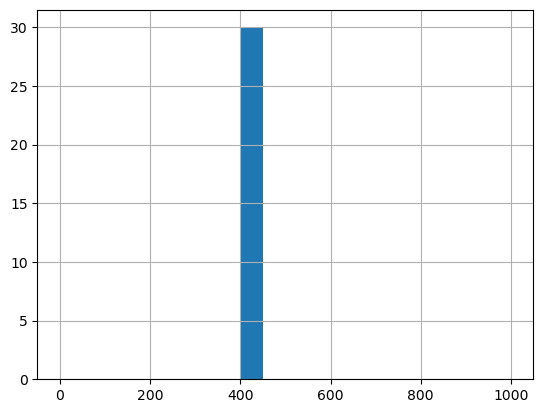

In [18]:
# 콘텐츠를 평가한 유저 숫자
rating_per_user = user.groupby('user_id')['rating'].count()
statistics.mean(rating_per_user.tolist())

# 유저별 평점 개수의 분포
rating_per_user.hist(bins=20, range=(0, 1000))

# 평점 수
user['rating'].value_counts()

<Axes: >

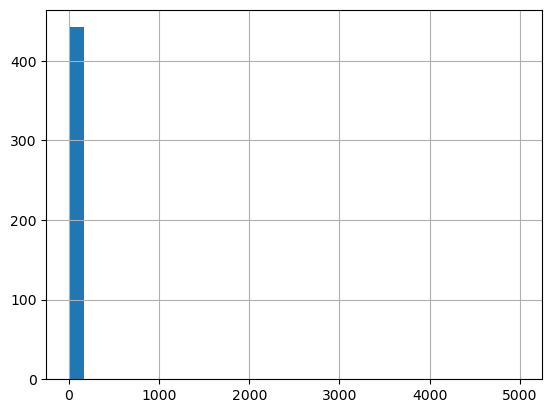

In [19]:
# 콘텐츠별 평가된 평점 등급
ratings_per_tale = user.groupby('tale_id')['rating'].count()
statistics.mean(ratings_per_tale.tolist())

# 콘텐츠별 평가된 빈도
ratings_per_tale.hist(bins=30, range=(0, 5000))

In [20]:
# rating이 0인 경우, 보지 않은 콘텐츠로 처리함
user['rating'].value_counts()

rating
0    2299
3    2244
4    2211
5    2201
1    2165
2    2140
Name: count, dtype: int64

### 유효값 필터링 (필요에 따라 사용하거나 사용하지 않을 수 있음)

In [21]:
# 너무 적게 평가된 콘텐츠 제거
ratings_per_tale_df = pd.DataFrame(ratings_per_tale)

# 평점 개수가 20개 이하 콘텐츠 제거
filtered_ratings_per_tale_df = ratings_per_tale_df[ratings_per_tale_df.rating >= 20]

# df -> list
# 인기가 많은 동화의 id 출력
popular_tale = filtered_ratings_per_tale_df.index.tolist()

In [22]:
# 너무 적게 평가한 유저 제거
rating_per_user_df = pd.DataFrame(rating_per_user)

# 평점 데이터 20개 이하일 경우 제거
filtered_rating_per_user_df = rating_per_user_df[rating_per_user_df.rating >= 20]
rating_users = filtered_rating_per_user_df.index.tolist()

### 피벗테이블 만들기

In [23]:
# 피벗테이블 만들기
rating_matrix = user.pivot_table(index='user_id', columns='tale_id', values='rating')

# 결측치 제거
rating_matrix = rating_matrix.fillna(0)
rating_matrix.shape

(30, 442)

In [24]:
# tale_id = columns
# user_id = index
# values = rating_data
rating_matrix.head()

tale_id,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
user_id,,,,,,,,,,,,,,,,,,,,,
0,2.0,5.0,4.0,0.0,5.0,4.0,3.0,5.0,1.0,0.0,...,1.0,4.0,3.0,4.0,0.0,4.0,0.0,0.0,3.0,1.0
1,0.0,0.0,4.0,4.0,0.0,2.0,5.0,0.0,4.0,4.0,...,1.0,2.0,5.0,1.0,5.0,2.0,1.0,1.0,1.0,4.0
2,0.0,0.0,2.0,0.0,5.0,5.0,2.0,2.0,1.0,2.0,...,3.0,1.0,5.0,2.0,4.0,0.0,4.0,5.0,0.0,4.0
3,5.0,0.0,3.0,5.0,1.0,0.0,5.0,4.0,2.0,1.0,...,1.0,3.0,0.0,3.0,5.0,0.0,4.0,0.0,4.0,4.0
4,1.0,2.0,2.0,1.0,2.0,0.0,2.0,5.0,4.0,5.0,...,2.0,1.0,2.0,5.0,2.0,5.0,2.0,1.0,1.0,1.0


### 비슷한 성향의 유저 찾기 - 코사인 유사도

In [25]:
def similar_users(user_id, matrix, k=5):
    # 현재 유저에 대한 데이터프레임 만들기
    # matrix의 index = user_id -> 현재 1명 유저에 대한 평가 정보 찾기
    user = matrix[matrix.index == user_id]

    # matrix index 값이 user_id와 다른가?
    # 일치하지 않는 값들은 other users
    other_users = matrix[matrix.index != user_id]

    # 대상 user, 다른 유저와의 cosine 유사도 계산
    # list 변환
    similarities = cosine_similarity(user.other_users)[0].tolist()

    # 다른 사용자의 인덱스 목록 생성
    other_users_list = other_users.index.tolist()

    # 인덱스/유사도로 이뤄진 딕셔너리 생성
    # dict(zip()) -> {'other_users_list1' : similarities, 'other_users_list2' : similarities}
    user_similarity = dict(zip(other_users_list, similarities))

    # 딕셔너리 정렬
    # key = operator.itemgetter(1) -> 오름차순 정렬 -> reverse -> 내림차순
    user_similarity_sorted = sorted(user_similarity.items(), key=operator.itemgetter(1))
    user_similarity_sorted.revrese()

    # 가장 높은 유사도 k개 정렬하기
    top_users_similarities = user_similarity_sorted[:k]
    users = [i[0] for i in top_users_similarities]

    return users

#### 해당 user_id와 other_users의 matrix를 따로 저장해준다

In [26]:
# 현재 유저에 대한 정보 찾기 (특정 유저 - 예) 23번 유저)
user_id = 23
user = rating_matrix[rating_matrix.index == user_id]

In [27]:
# matrix index값이 user_id와 다른가?
other_users = rating_matrix[rating_matrix.index != user_id]

#### cosine_similarity() 함수로 대상 유저와 다른 유저들 사이의 유사도 계산

In [29]:
# 대상 user, 다른 유저와의 cosine 유사도 계산
# list 변환
similarities = cosine_similarity(user, other_users)[0].tolist()

#### dict(zip()) 함수를 이용하여 dict에 other_user마다 similarity 값을 넣는다

In [30]:
# 다른 사용자의 인덱스 목록 생성
other_users_list = other_users.index.tolist()

# 인덱스/유사도로 이뤄진 딕셔너리 생성
# dict(zip()) -> {'other_users_list1' : similarities, 'other_users_list2' : similarities}
user_similarity = dict(zip(other_users_list, similarities))

#### 특정 유저와 가장 유사도가 높은 k개를 정렬한다

In [31]:
# 딕셔너리 정렬
# key = operator.itemgetter(1) -> 오름차순 정렬 -> reverse -> 내림차순
user_similarity_sorted = sorted(user_similarity.items(), key = operator.itemgetter(1))
user_similarity_sorted.reverse()

# 가장 높은 유사도 k개 정렬하기
k = 5
top_users_similarities = user_similarity_sorted[:k]
users = [i[0] for i in top_users_similarities]

### 콘텐츠 추천하기

In [44]:
def recommend_item(user_index, similar_user_indices, matrix, items=10):
    # 유저와 비슷한 유저 가져오기
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    
    # 비슷한 유저 평균 계산 # row 계산
    similar_users = similar_users.mean(axis=0)

    # df변환, 정렬/필터링 용이
    similar_users_df = pd.DataFrame(similar_users, columns=['user_similarity'])

    # 현재 사용자의 벡터 가져오기: matrix = rating_matrix(pivot table)
    user_df = matrix[matrix.index == user_index]

    # 현재 사용자의 평가 데이터 정렬
    user_df_transposed = user_df.transpose()

    # 컬럼명 변경 
    user_df_transposed.columns = ['rating']

    # 미시청 콘텐츠 목록리스트 만들기
    tale_unseen = user_df_transposed.index.tolist()

    # 미시청 콘텐츠 필터링
    similar_users_df_filtered =similar_users_df[similar_users_df.index.isin(tale_unseen)]

    # 평균값을 기준으로 내림차순 정렬
    similar_users_df_ordered = similar_users_df_filtered.sort_values(by=['user_similarity'], ascending=False)

    # 상위 10개 값 가져오기
    items = 10
    top_n_tale = similar_users_df_ordered.head(items)
    top_n_tale_indices = top_n_tale.index.tolist()

    # tale df에서 top10 값 찾기
    tale_info = df[df['tale_id'].isin(top_n_tale_indices)]
    tale_info

    return tale_info # items

In [50]:
# 추천 콘텐츠 뽑아내기
recommend_content = recommend_item(user_id, other_users, rating_matrix)

print("--콘텐츠 추천 top 10--")

# 모든 추천
print(recommend_content)
print()

# tale_id만 뽑기
print("-- tale_id --")
print(recommend_content['tale_id'])

# 제목만 뽑기
print(recommend_content['제목'])

--콘텐츠 추천 top 10--
     tale_id               제목  \
16        16        도둑과 도둑 선생   
33        33          고집불통 아이   
47        47          은화가 된 별   
120      120          고양이와 수탉   
196      196   농장(농가)에 들어간 사자   
281      281        까마귀와 헤르메스   
289      289     방탕아(낭비자)와 제비   
292      292  사자 가죽을 뒤집어쓴 당나귀   
332      332     사자와 제우스와 코끼리   
352      352         장님과 앉은뱅이   

                                                    내용    카테고리  \
16   ‘한스’는 자기 아들에게 어떤 ‘일’을 배우게 할지 알고 싶어 교회로 가 우리 주 ...  그림형제동화   
33   옛날에 고집불통인 아이가 살았어요.\r\n어찌나 고집을 부리는지 엄마가 시키는 건 ...  그림형제동화   
47   옛날에 아빠 엄마를 잃은 어린 소녀가 하나 있었지요.그녀는 너무도 가난하여 묵을 방...  그림형제동화   
120  고양이가 수탉을 잡더니 어찌되었건 잡아먹을 그럴싸한 구실을 댔어요.\r\n“넌 야밤...    이솝우화   
196  사자가 농장에 들어왔어요.\r\n농부는 얼른 문을 닫았어요, 사자를 생포할 생각이었...    이솝우화   
281  덫에 걸린 까마귀가 아폴로 신에게 기도했어요.\r\n“저 좀 풀어주세요, 그럼 제가...    이솝우화   
289  어머나, 젊은 사람이 어찌나 낭비벽이 심한지 재산을 몽땅 탕진하고 딸랑 명품 외투 ...    이솝우화   
292  사자 가죽을 뒤집어쓴 당나귀가 숲 여기저기를 어슬렁거렸어요. 그와 마주치는 어리석은...    이솝우화   
332  사자가 불만이 이만저만이 아니었어요

,tale_id,제목,내용,카테고리,키워드,테마
16,16,도둑과 도둑 선생,‘한스’는 자기 아들에게 어떤 ‘일’을 배우게 할지 알고 싶어 교회로 가 우리 주 ...,그림형제동화,"['아빠', '도둑', '한스', '도둑질', '꾀']",숲속
33,33,고집불통 아이,옛날에 고집불통인 아이가 살았어요.\r\n어찌나 고집을 부리는지 엄마가 시키는 건 ...,그림형제동화,"['딸', '엄마', '고집']",마을
47,47,은화가 된 별,옛날에 아빠 엄마를 잃은 어린 소녀가 하나 있었지요.그녀는 너무도 가난하여 묵을 방...,그림형제동화,"[기부, 소녀]",마을
120,120,고양이와 수탉,고양이가 수탉을 잡더니 어찌되었건 잡아먹을 그럴싸한 구실을 댔어요.\r\n“넌 야밤...,이솝우화,"['고양이', '수탉', '말싸움']",마을
196,196,농장(농가)에 들어간 사자,"사자가 농장에 들어왔어요.\r\n농부는 얼른 문을 닫았어요, 사자를 생포할 생각이었...",이솝우화,"['사자', '농장', '농부', '공격', '욕심']",농장
